In [604]:
import numpy as np
import pandas as pd
import sklearn as sk
import statsmodels.api as sm
from statsmodels.compat import lzip

# Подготовка и имитация

In [605]:
data = pd.read_excel(r"C:\Users\Igor\Downloads\Dataset.xlsx")
X = data.iloc[:, 4:]
Y = data.iloc[:, 3]
X['const'] = 1

In [606]:
results_OLS = sm.OLS(np.log(Y), X).fit()

In [607]:
pr_OLS = results.predict()
real_predict_OLS = np.array([np.exp(1)**elem for elem in pr_OLS])

In [608]:
real_predict_OLS

array([ 3757.653215  ,  3572.9154114 ,  4737.80318778,  3233.26465581,
        3650.37362454,  3149.50637227,  1856.03534712,  1829.34142335,
        3195.21068881,  3170.5016554 ,  2946.86383075,  3529.41731374,
        3742.27140203,  1424.35067805,  3028.63030538,  1839.40470268,
        3863.10836204,  3367.18537243,  2791.67862799,  2136.99372571,
        6755.61490549,  3167.39495286,  4946.05971792,  2630.42679278,
        4209.44362979,  7216.7165523 ,  3580.54634585,  5362.77557205,
        2584.16789685,  2570.88760174,  4023.24406345, 10558.8396719 ,
        2535.93158171,  1956.34912273,  3738.36884186,  2670.19897886,
        4162.56697603,  3305.79510346,  1867.62899901,  2924.62249075,
        3592.38519685,  3379.26838709,  1821.38128563,  3107.37883079,
        2282.41997184,  2340.70188981,  3840.54156334,  3113.30973673])

In [610]:
results_QUAN = sm.QuantReg(np.log(Y), X).fit(q= 0.61, max_iter= 1)

F:\ANACONDA\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (1) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


In [611]:
pr_QUAN = results_QUAN.predict()

In [612]:
real_predict_QUAN = np.array([np.exp(1)**elem for elem in pr_QUAN])

In [646]:
results_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     5.381
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           3.16e-05
Time:                        00:35:31   Log-Likelihood:                 3.5949
No. Observations:                  48   AIC:                             26.81
Df Residuals:                      31   BIC:                             58.62
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Gini              0.0342      0.010      3.422      0.002       0.014       0.055
HOR              -0.0007      0.003     -0.259      0.798      -0.006       0.005
Inflation        -0.0182      0.043     -0.421      0.676      -0.106       0.070
URate            -0.0359      0.012     -3.039      0.005      -0.060      -0.012
Capital           0.1120      0.131      0.855      0.399      -0.155       0.379
Euro_area         0.1640      0.167      0.983      0.333      -0.176       0.504
EU               -0.1328      0.275     -0.482      0.633      -0.694       0.429
Population       -0.2808      0.146     -1.924      0.064      -0.578       0.017
Density           0.0343      0.014      2.380      0.024       0.005       0.064
Housing_stock     0.0007      0.000      1.687      0.102      -0.000       0.002
Pop2HS            0.4891      0.190      2.569      0.015       0.101       0.877
GDP_PC_PPP        0.0052      0.004      1.326      0.194      -0.003       0.013
GBL_10y          -0.0037      0.020     -0.182      0.857      -0.045       0.038
MIR              -0.0064      0.014     -0.447      0.658      -0.036       0.023
DMIR              0.0876      0.088      1.001      0.325      -0.091       0.266
Mortgage_PC       0.0083      0.006      1.394      0.173      -0.004       0.021
const             5.9321      0.552     10.737      0.000       4.805       7.059
==============================================================================
Omnibus:                        0.210   Durbin-Watson:                   2.283
Prob(Omnibus):                  0.900   Jarque-Bera (JB):                0.412
Skew:                           0.024   Prob(JB):                        0.814
Kurtosis:                       2.548   Cond. No.                     1.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [659]:
ress = pd.DataFrame([Y, real_predict_OLS, real_predict_QUAN], index = ['Реальная цена', 'Предсказание МНК', 'Предсказание квантильной']).T
ress['Остатки МНК'] = ress['Реальная цена'] - ress['Предсказание МНК']
ress['Остатки квантильной'] = ress['Реальная цена'] - ress['Предсказание квантильной']
ress['Разница МНК'] = ress['Остатки МНК']*100/ress['Реальная цена']
ress['Разница квантидьной'] = ress['Остатки квантильной']*100/ress['Реальная цена']

In [660]:
ress.head()

,Реальная цена,Предсказание МНК,Предсказание квантильной,Остатки МНК,Остатки квантильной,Разница МНК,Разница квантидьной
0,4204.414279,3757.653215,3757.653215,446.761064,446.761064,10.626000,10.626000
1,2754.160776,3572.915411,3572.915411,-818.754635,-818.754635,-29.727917,-29.727917
2,4355.664323,4737.803188,4737.803188,-382.138865,-382.138865,-8.773377,-8.773377
3,2382.019402,3233.264656,3233.264656,-851.245254,-851.245254,-35.736285,-35.736285
4,2223.927765,3650.373625,3650.373625,-1426.445860,-1426.445860,-64.140836,-64.140836


In [613]:
sn.set(font_scale = 1.5)
sn.set_style("whitegrid")

C:\Users\Igor\AppData\Local\Temp/ipykernel_15016/2000712619.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=data['City_Short'], rotation=90)


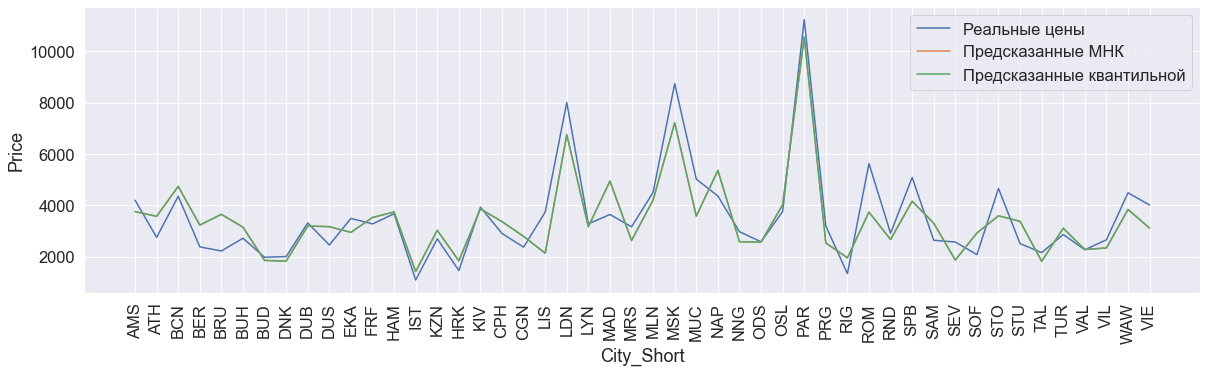

In [644]:
sn.set(rc={'figure.figsize':(20,5.27)})
sn.set(font_scale = 1.5)
ax = sn.lineplot(x= data['City_Short'], y=Y)
ax.set_xticklabels(labels=data['City_Short'], rotation=90)
sn.lineplot(x= data['City_Short'], y=real_predict_OLS)
sn.lineplot(x= data['City_Short'], y=real_predict_QUAN)
ax.legend(labels = ['Реальные цены', 'Предсказанные МНК', 'Предсказанные квантильной'])

# Backward elimination метод отбора переменных 

In [491]:
f_metr = [results_OLS.rsquared_adj]

In [662]:
stop_list = {'const': 1}

In [663]:
def bw_elim(Y, X, stop, f_metr):
    stock = {}
    for elem in (X[X.columns.difference(stop.keys())]):
        stock.update({elem: sm.OLS(np.log(Y), X[X.columns.difference([elem])]).fit().rsquared_adj})
    #print(pd.Series(stock))
    res = pd.Series(stock).sort_values(axis=0, ascending= False)
    stop.update({res.index.values[0]: f_metr[-1] - res.values[0]})
    f_metr.append(res.values[0])

In [664]:
while len(stop_list) < len(X.columns) - 1:
    bw_elim(Y, X, stop_list, f_metr)

In [665]:
stop_list

{'const': 1,
 'GBL_10y': -0.11545770543170952,
 'HOR': 0.0004237350890994307,
 'Inflation': 0.0013893803406148653,
 'MIR': 0.00027933540306546156,
 'EU': 0.00041108373918741226,
 'Capital': 0.00625237553535174,
 'Euro_area': 0.0029608700089867046,
 'DMIR': 0.0004298670689462103,
 'GDP_PC_PPP': 0.009500895176375979,
 'Mortgage_PC': 0.0023276527833115956,
 'Housing_stock': 0.01132726356744529,
 'Population': 0.010693392114500933,
 'Density': 0.02464614247928887,
 'Pop2HS': 0.01174908786644624,
 'URate': 0.033066624259088795}

In [661]:
pd.DataFrame(index=stop_list.keys(), data = stop_list.values(), columns= ['adj R^2 предыдущей модели - adj R^2 модели без переменной']).iloc[1:, :]

,adj R^2 предыдущей модели - adj R^2 модели без переменной
GBL_10y,-0.012128
HOR,0.000424
Inflation,0.001389
MIR,0.000279
EU,0.000411
Capital,0.006252
Euro_area,0.002961
DMIR,0.000430
GDP_PC_PPP,0.009501
Mortgage_PC,0.002328


# Построение и тесты финальной модели

## Мы пришли к выводу, что без 10-летних облигаций модель будет лучше и решили удалить их из анализа. Построим конечную регрессионную модель и проведем необходимые тесты

In [503]:
new_X = X.copy()

In [510]:
new_X = new_X.drop('GBL_10y', axis= 1)

<AxesSubplot:xlabel='City_Short', ylabel='Price'>

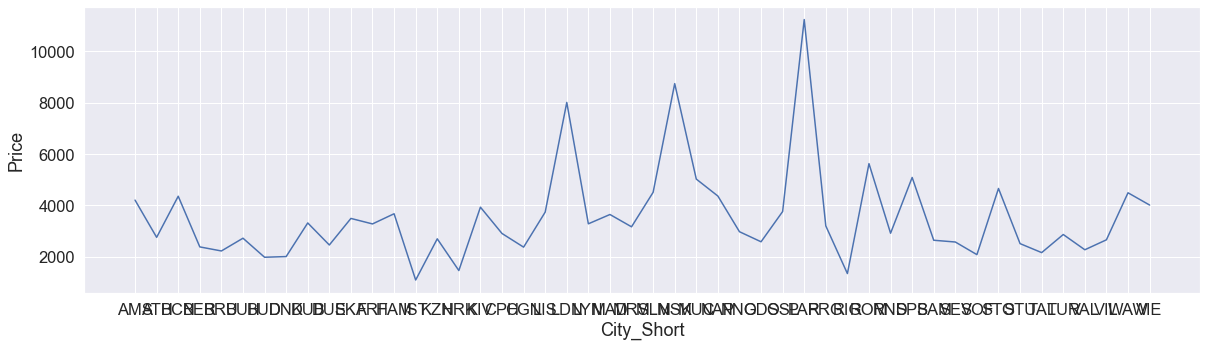

In [666]:
sn.lineplot(x= data['City_Short'], y=Y)


<AxesSubplot:xlabel='City_Short', ylabel='Price'>

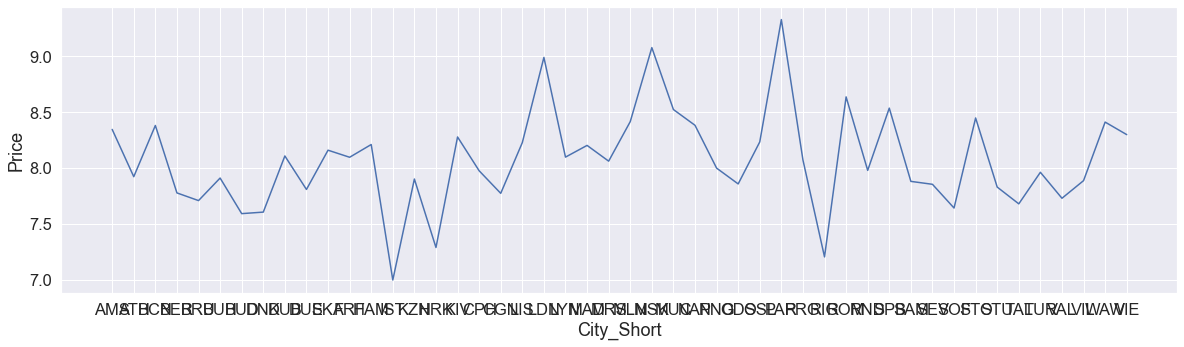

In [668]:
sn.lineplot(x= data['City_Short'], y=np.log(Y))

In [511]:
fin_OLS = sm.OLS(np.log(Y), new_X).fit()

In [514]:
print(fin_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     5.916
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           1.27e-05
Time:                        19:30:45   Log-Likelihood:                 3.5693
No. Observations:                  48   AIC:                             24.86
Df Residuals:                      32   BIC:                             54.80
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Gini              0.0340      0.010      3.475

In [518]:
fin_OLS_res = fin_OLS.predict()

In [520]:
fin_predict_OLS = np.array([np.exp(1)**elem for elem in fin_OLS_res])

In [521]:
OLS_ost = fin_predict_OLS - Y

In [722]:
0.4895*np.exp(1)

1.3305989550307025

## Спецификация

In [558]:
for_pairplot = new_X.drop(['Capital', 'Euro_area', 'EU', 'const', 'Mortgage_PC', 'GDP_PC_PPP', 'DMIR', 'MIR', 'Inflation', 'HOR'], axis = 1)

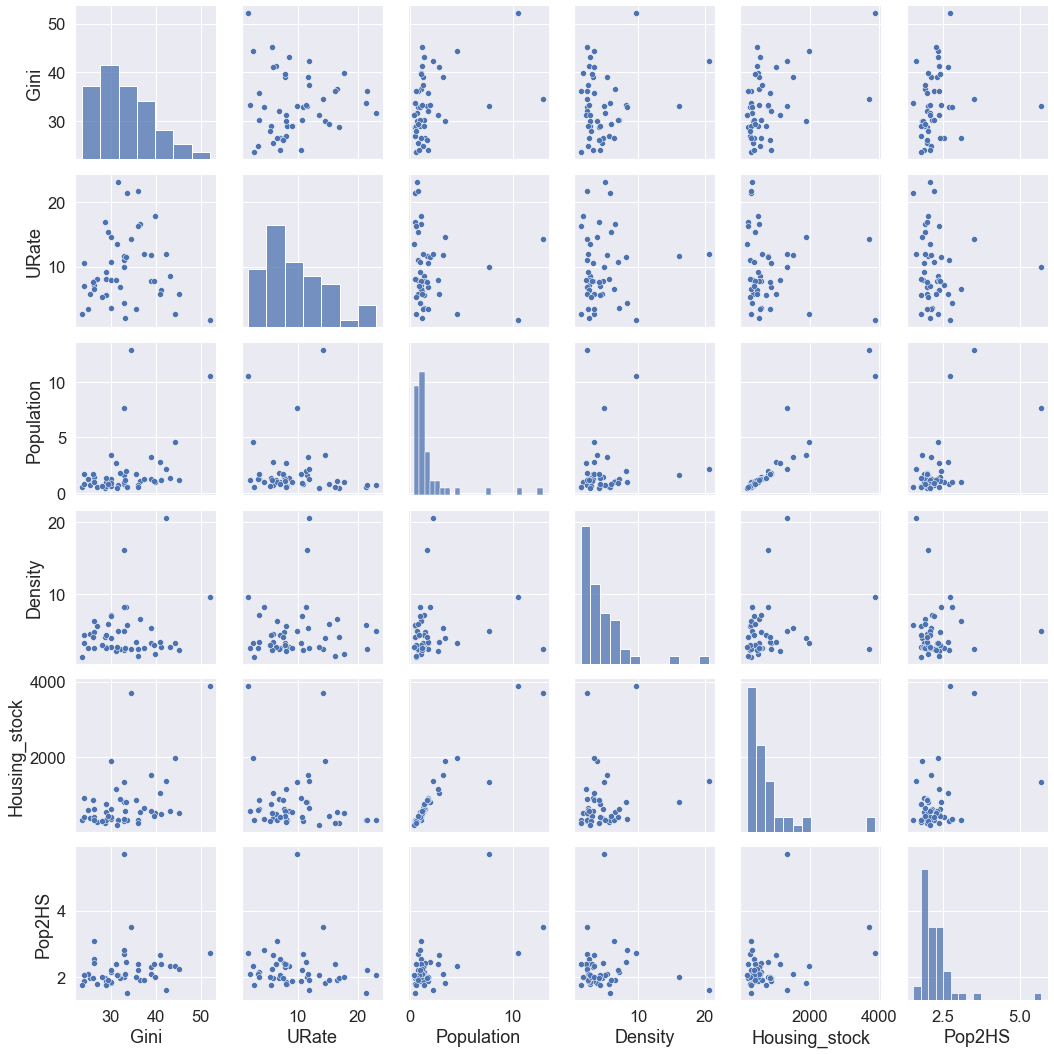

In [560]:
sn.set(font_scale = 1.5)
ax = sn.pairplot(for_pairplot)

In [676]:
import matplotlib.pyplot as plt

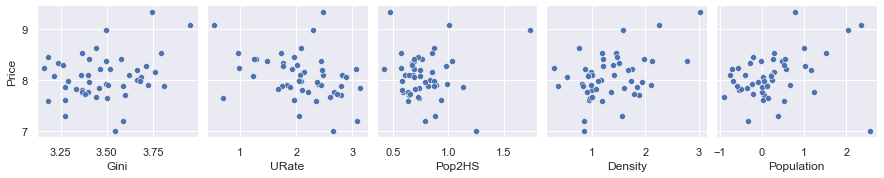

In [705]:
sn.set(rc={'figure.figsize':(11.7,8.27)})
log_data = data.copy(deep= True)
log_data['Price'] = np.log(log_data['Price'])
log_data['Gini'] = np.log(log_data['Gini'])
log_data['URate'] = np.log(log_data['URate'])
log_data['Pop2HS'] = np.log(log_data['Pop2HS'])
log_data['Density'] = np.log(log_data['Density'])
log_data['Population'] = np.log(log_data['Population'])
pp = sn.pairplot(data=log_data,
                  y_vars=['Price'],
                  x_vars=['Gini', 'URate', 'Pop2HS', 'Density', 'Population'])

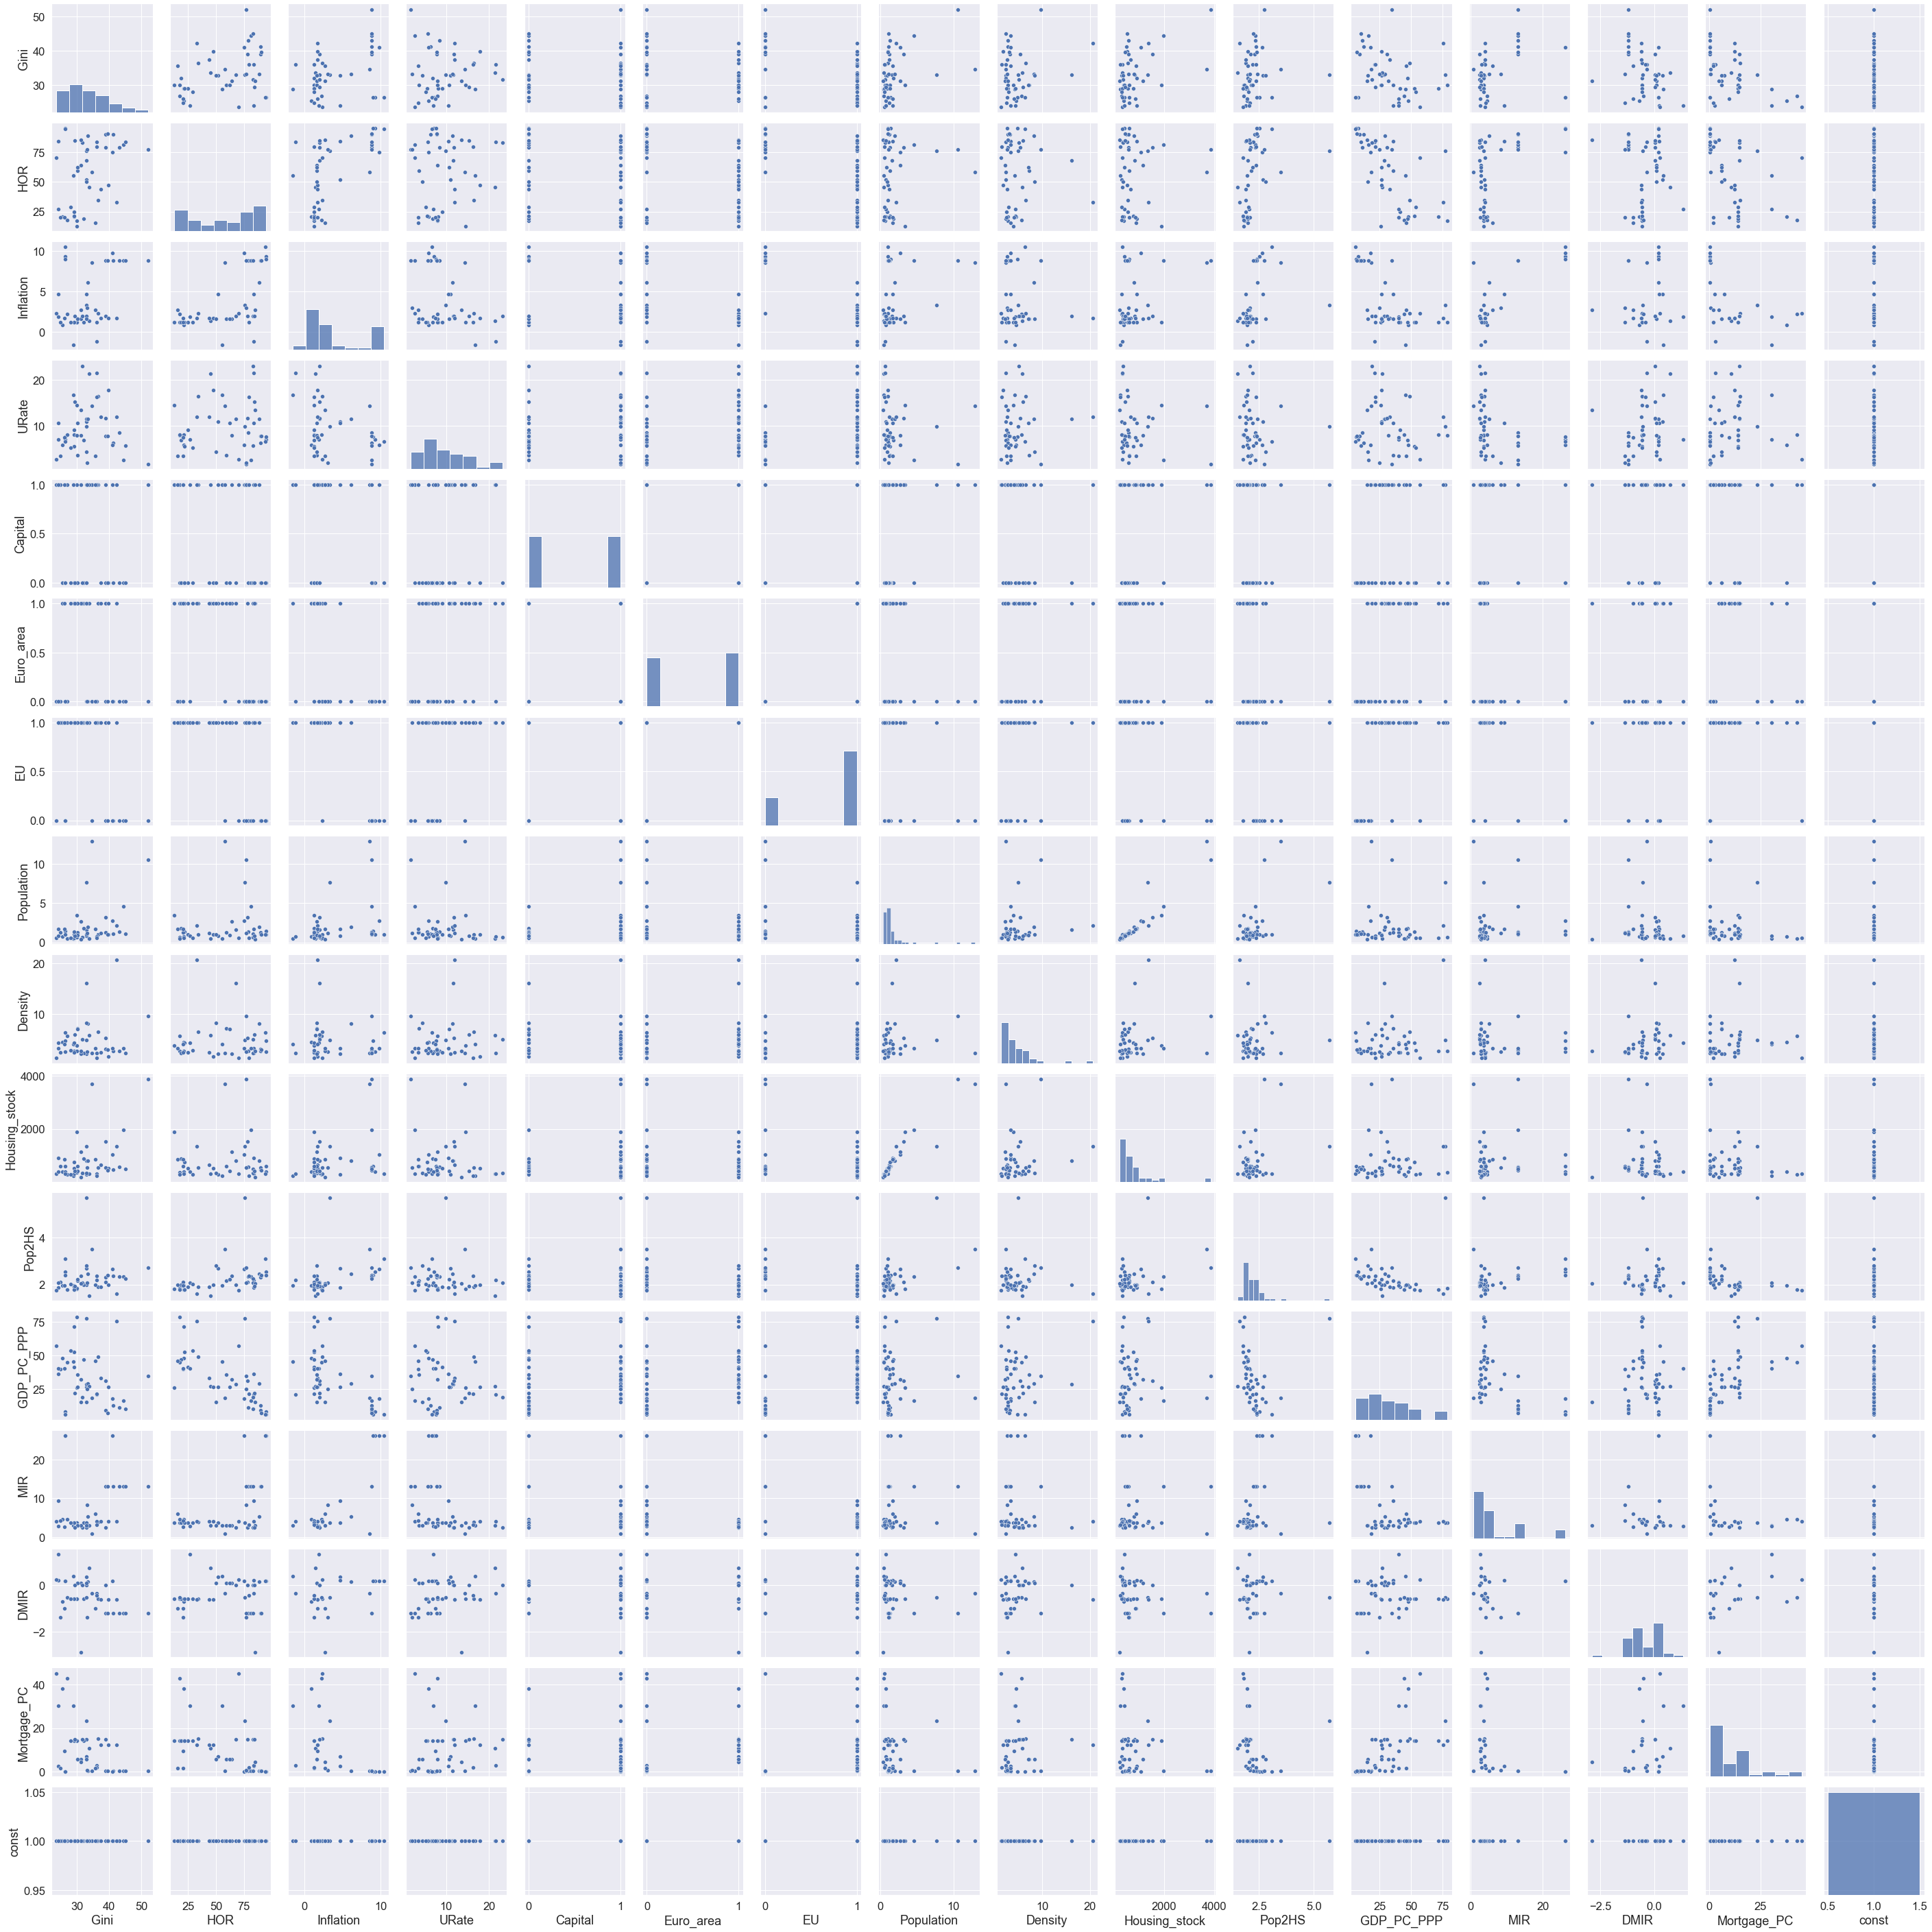

In [561]:
ax = sn.pairplot(new_X)

## Тест Чоу

In [717]:
from chow_test import chow_test
chow_test(new_X.sample(48), Y, last_index=23, first_index= 24, significance=0.05)

Fail to reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 0.47630801980785004, P_value: 0.9237023870309733


(0.47630801980785004, 0.9237023870309733)

## Автокорреляция

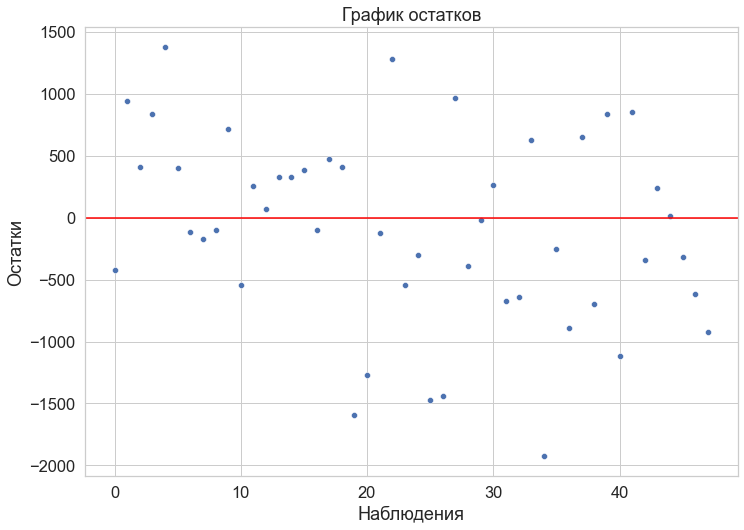

In [525]:
ax = sn.scatterplot(data = OLS_ost)
ax.set(xlabel = 'Наблюдения', ylabel = 'Остатки', title = 'График остатков')
ax.axhline(0, color = 'red')
#ax.figure.savefig(r"C:\Users\Igor\Documents\stata\График_остатков_финальный")

## Мультиколлинеарность

<AxesSubplot:>

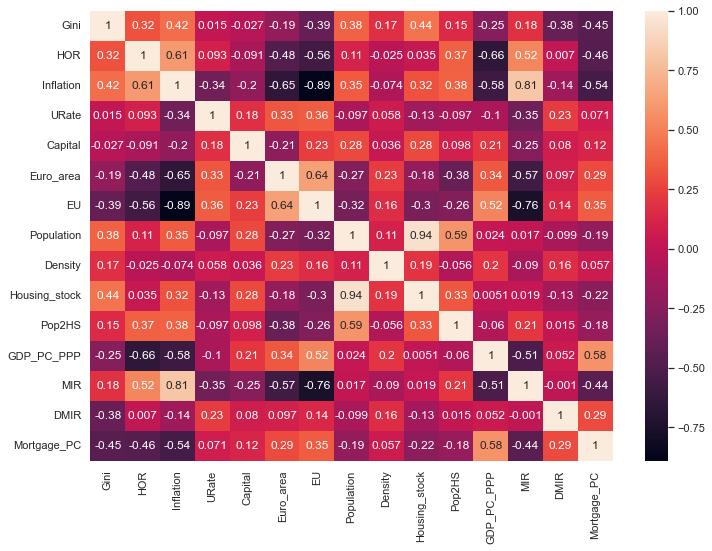

In [534]:
sn.set(font_scale = 1)
sn.heatmap(new_X.drop('const', axis = 1).corr(), annot= True)

In [540]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [552]:
vif = pd.DataFrame(index = new_X.columns[:-1])
vif["VIF-Значение"] = [VIF(new_X.drop('const', axis = 1).values, i) for i in range(new_X.shape[1] - 1)]

In [553]:
vif

,VIF-Значение
Gini,61.373316
HOR,15.888652
Inflation,19.265710
URate,9.492118
Capital,3.894393
Euro_area,6.435068
EU,27.662050
Population,99.192560
Density,3.681784
Housing_stock,93.159464


## Гетероскедастичность

### Тест Голдфелда-Квандта

In [570]:
sm.stats.diagnostic.het_goldfeldquandt(Y, new_X, alternative='two-sided')

(0.6547888070248066, 0.5630046927774687, 'two-sided')

In [592]:
def Goldfeld_Quandt_test(Y, X, p_level: float=0.95, model_name=''):
    a_level = 1 - p_level
    # реализация теста
    test = sm.stats.diagnostic.het_goldfeldquandt(Y, X)
    test_result = lzip(['F_statistic', 'p_calc'], test)    # распаковка результатов теста
    # расчетное значение статистики F-критерия
    F_calc_tuple = test_result[0]
    F_statistic = F_calc_tuple[1]
    # расчетный уровень значимости
    p_calc_tuple = test_result[1]
    p_calc = p_calc_tuple[1]
    # вывод
    conclusion_test = 'heteroscedasticity' if p_calc < a_level else 'not heteroscedasticity'
    result = pd.DataFrame({
        'test': ('Goldfeld–Quandt test'),
        'p_level': (p_level),
        'a_level': (a_level),
        'F_statistic': (F_statistic),
        'p_calc': (p_calc),
        'p_calc < a_level': (p_calc < a_level),
        'heteroscedasticity_check': (conclusion_test)
        },
        index=[model_name])
    return result

In [593]:
Goldfeld_Quandt_test(Y, new_X, p_level=0.95, model_name='linear_ols')

,test,p_level,a_level,F_statistic,p_calc,p_calc < a_level,heteroscedasticity_check
linear_ols,Goldfeld–Quandt test,0.95,0.05,0.654789,0.718498,False,not heteroscedasticity
